In [3]:
import os, shutil

In [15]:
original_data_dir = "/Users/sidparmar/workspace-ml/catsanddogs/petImages"

In [16]:
base_dir = '/Users/sidparmar/workspace-ml/deep-learning-with-python/cats_and_dogs'
os.mkdir(base_dir)

In [17]:
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'val')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [18]:
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

Copy cats files to test, validation and train dirs

In [19]:
fnames = [str(i) + '.jpg' for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_data_dir, 'Cat/' + fname)
    dest = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dest)

In [20]:
fnames = [str(i) + '.jpg' for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_data_dir, 'Cat/' + fname)
    dest = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dest)

In [21]:
fnames = [str(i) + '.jpg' for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_data_dir, 'Cat/' + fname)
    dest = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dest)

Copy dogs files to test, validation and train dirs

In [22]:
fnames = [str(i) + '.jpg' for i in range(1000)]

for fname in fnames:
    src = os.path.join(original_data_dir, 'Dog/' + fname)
    dest = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dest)

In [23]:
fnames = [str(i) + '.jpg' for i in range(1000, 1500)]

for fname in fnames:
    src = os.path.join(original_data_dir, 'Dog/' + fname)
    dest = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dest)

In [24]:
fnames = [str(i) + '.jpg' for i in range(1500, 2000)]

for fname in fnames:
    src = os.path.join(original_data_dir, 'Dog/' + fname)
    dest = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dest)

In [25]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


### imports

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

### Build model

In [27]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [29]:
model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=['accuracy'])

### Data Processing

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [31]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [32]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [33]:
for data_batch, label_batch in train_generator:
    print("Data batch shape", data_batch.shape)
    print("Label batch shape", label_batch.shape)
    break

Data batch shape (20, 150, 150, 3)
Label batch shape (20,)


#### Fit model

Check if all the images are valid images

In [37]:
from PIL import Image
folder_path = train_dir
extensions = []
for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for filee in os.listdir(sub_folder_path):
        file_path = os.path.join(sub_folder_path, filee)
        print('** Path: {}  **'.format(file_path), end="\r", flush=True)
        im = Image.open(file_path)
        rgb_im = im.convert('RGB')
        if filee.split('.')[1] not in extensions:
            extensions.append(filee.split('.')[1])

In [38]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 100 steps, validate for 50 steps
Epoch 1/30
100/100 [==============================] - 32s 322ms/step - loss: 0.6843 - accuracy: 0.5460 - val_loss: 0.6607 - val_accuracy: 0.6190
Epoch 2/30
100/100 [==============================] - 35s 346ms/step - loss: 0.6495 - accuracy: 0.6160 - val_loss: 0.6351 - val_accuracy: 0.6490
Epoch 3/30
100/100 [==============================] - 35s 345ms/step - loss: 0.5926 - accuracy: 0.6855 - val_loss: 0.6426 - val_accuracy: 0.6260
Epoch 4/30
100/100 [==============================] - 33s 333ms/step - loss: 0.5541 - accuracy: 0.7135 - val_loss: 0.5971 - val_accuracy: 0.6770
Epoch 5/30
100/100 [==============================] - 30s 303ms/step - loss: 0.5260 - accuracy: 0.7295 - val_loss: 0.5741 - val_accuracy: 0.6900
Epoch 6/30
100/100 [==============================] - 30s 304ms/step - loss: 0.5042 - accuracy: 0.7605 - val_loss: 0.5656 - val_accuracy: 0.7050
Epoch 7/30
100/100 [=================

In [39]:
model.save('cats_and_dogs_small_1.h5')

Let's plot loss and accuracy of our model

In [40]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [41]:
epochs = range(1, len(acc) + 1)

In [42]:
def plot_accuracy(acc, val_acc, epochs):
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    plt.show()
    
def plot_loss(loss, val_loss, epochs):
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    
    plt.figure()
    plt.show()    

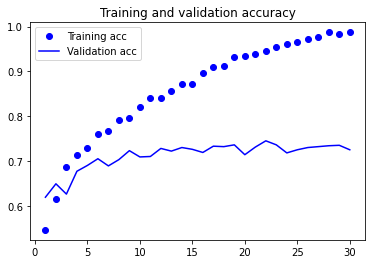

<Figure size 432x288 with 0 Axes>

In [43]:
plot_accuracy(acc, val_acc, epochs)

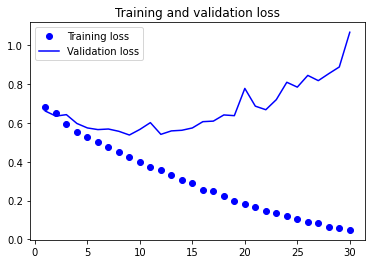

<Figure size 432x288 with 0 Axes>

In [44]:
plot_loss(loss, val_loss, epochs)

### Data Augmentation

In [45]:
datagen = ImageDataGenerator(rotation_range=40, 
                             width_shift_range=0.2, 
                             height_shift_range=0.2, 
                             zoom_range=0.2, 
                             shear_range=0.2, 
                             horizontal_flip=True, 
                             fill_mode='nearest')

Displaying some randomly augmented images

In [46]:
from tensorflow.keras.preprocessing import image

In [47]:
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

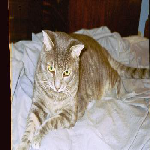

In [48]:
img_path = fnames[3]
img = image.load_img(img_path, target_size=(150,150))
img

In [49]:
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

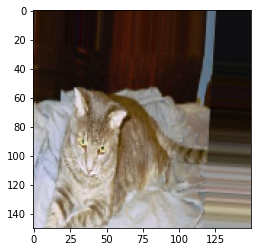

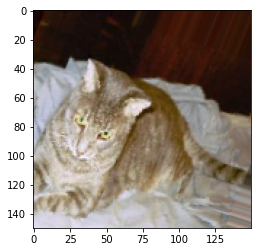

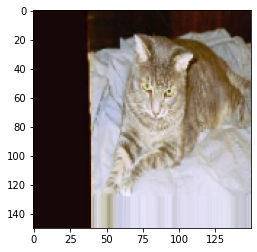

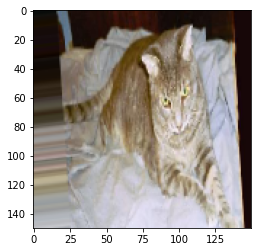

In [50]:
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    
    i +=1 
    if i % 4 == 0:
        break
plt.show()

In [51]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

In [52]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [53]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                  rotation_range=40,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size=(150,150),
                                                   batch_size=32,
                                                   class_mode="binary")

validation_generator = test_datagen.flow_from_directory(validation_dir,
                                                       target_size=(150,150),
                                                       batch_size=32,
                                                       class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [54]:
history_with_data_augmentation = model.fit(train_generator,
                                          steps_per_epoch=np.ceil((2000*0.2/32)-1),
                                          epochs=100,
                                          validation_data=validation_generator,
                                          validation_steps=np.ceil((500*0.2/32)-1))

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 12.0 steps, validate for 3.0 steps
Epoch 1/100
12/12 [==============================] - 7s 569ms/step - loss: 0.7043 - accuracy: 0.4870 - val_loss: 0.6851 - val_accuracy: 0.5833
Epoch 2/100
12/12 [==============================] - 7s 576ms/step - loss: 0.6956 - accuracy: 0.5026 - val_loss: 0.7304 - val_accuracy: 0.4167
Epoch 3/100
12/12 [==============================] - 7s 573ms/step - loss: 0.6926 - accuracy: 0.5286 - val_loss: 0.6691 - val_accuracy: 0.5833
Epoch 4/100
12/12 [==============================] - 7s 606ms/step - loss: 0.6906 - accuracy: 0.5286 - val_loss: 0.6779 - val_accuracy: 0.5833
Epoch 5/100
12/12 [==============================] - 6s 500ms/step - loss: 0.6880 - accuracy: 0.5391 - val_loss: 0.7100 - val_accuracy: 0.4167
Epoch 6/100
12/12 [==============================] - 6s 491ms/step - loss: 0.6902 - accuracy: 0.5339 - val_loss: 0.6632 - val_accuracy: 0.5833
Epoch 7/100
12/12 [============================

save the new model

In [55]:
model.save('cats_and_dogs_small_2.h5')

Plotting loss and accuracy 

In [56]:
acc = history_with_data_augmentation.history['accuracy']
val_acc = history_with_data_augmentation.history['val_accuracy']

loss = history_with_data_augmentation.history['loss']
val_loss = history_with_data_augmentation.history['val_loss']

epochs = range(1, len(acc) + 1)

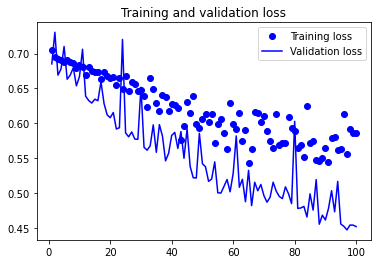

<Figure size 432x288 with 0 Axes>

In [57]:
plot_loss(loss, val_loss, epochs)

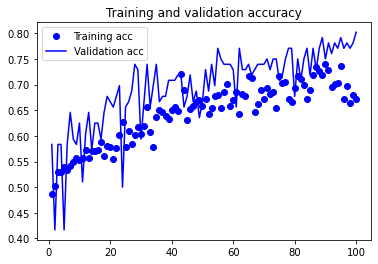

<Figure size 432x288 with 0 Axes>

In [58]:
plot_accuracy(acc, val_acc, epochs)

### VGG16

Fast Feature extraction without data augmentation

In [6]:
from tensorflow.keras.applications import VGG16

In [7]:
conv_base = VGG16(weights='imagenet', 
                  include_top=False, 
                  input_shape=(150,150,3))

In [61]:
batch_size = 20

In [62]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    
    generator = datagen.flow_from_directory(directory, 
                                           target_size=(150,150),
                                           batch_size=batch_size,
                                           class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        
        i +=1 
        if i * batch_size >= sample_count:
            break
            
    return features, labels

In [63]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [64]:
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

#### Build model

In [8]:
import tensorflow as tf

In [9]:
tf.keras.backend.clear_session()

In [67]:
model = models.Sequential()
model.add(layers.Dense(256, activation="relu", input_dim=(4 * 4 * 512)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

In [68]:
model.compile(loss="binary_crossentropy", 
              optimizer=optimizers.RMSprop(lr = 2e-5), 
              metrics=['acc'])

In [69]:
history_base_conv_no_data_aug = model.fit(train_features, 
                                         train_labels,
                                         epochs=30,
                                         batch_size=20,
                                         validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 1ms/sample - loss: 5.7271 - acc: 0.6450 - val_loss: 1.8566 - val_acc: 0.7760
Epoch 2/30
2000/2000 [==============================] - 2s 892us/sample - loss: 2.8455 - acc: 0.7735 - val_loss: 1.4786 - val_acc: 0.8220
Epoch 3/30
2000/2000 [==============================] - 2s 876us/sample - loss: 1.8352 - acc: 0.8350 - val_loss: 1.3729 - val_acc: 0.8420
Epoch 4/30
2000/2000 [==============================] - 2s 858us/sample - loss: 1.5118 - acc: 0.8525 - val_loss: 1.3261 - val_acc: 0.8520
Epoch 5/30
2000/2000 [==============================] - 2s 895us/sample - loss: 1.2229 - acc: 0.8730 - val_loss: 1.1482 - val_acc: 0.8680
Epoch 6/30
2000/2000 [==============================] - 2s 962us/sample - loss: 0.9977 - acc: 0.8870 - val_loss: 1.0970 - val_acc: 0.8690
Epoch 7/30
2000/2000 [==============================] - 2s 882us/sample - loss: 0.7631 - acc: 0.9045 - val_loss: 1.1183 - val_

Plot loss and accuracy

In [73]:
acc = history_base_conv_no_data_aug.history['acc']
val_acc = history_base_conv_no_data_aug.history['val_acc']

loss = history_base_conv_no_data_aug.history['loss']
val_loss = history_base_conv_no_data_aug.history['val_loss']

epochs = range(1, len(acc) + 1)

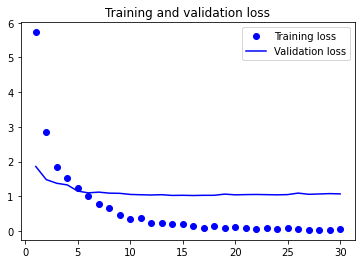

<Figure size 432x288 with 0 Axes>

In [74]:
plot_loss(loss=loss, val_loss=val_loss, epochs=epochs)

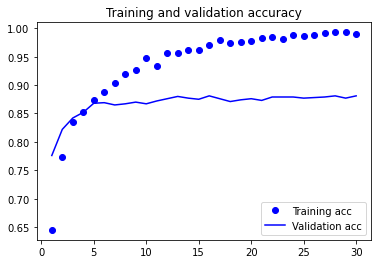

<Figure size 432x288 with 0 Axes>

In [75]:
plot_accuracy(acc, val_acc, epochs)

88% val accuracy

#### Feature extraction with data augmentation

Note: Do not try without a GPU

In [109]:
# model = models.Sequential()
# model.add(conv_base)
# model.add(layers.Flatten())
# model.add(layers.Dense(256, activation="relu"))
# model.add(layers.Dense(1, activation="sigmoid"))

In [110]:
# model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [111]:
# print('This is the number of trainable weights '
#          'before freezing the conv base:', len(model.trainable_weights))
# conv_base.trainable = False
# print('This is the number of trainable weights '
#           'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [112]:
# train_datagen = ImageDataGenerator(rescale=1./255,
#                                   rotation_range=40,
#                                   width_shift_range=0.2,
#                                   height_shift_range=0.2,
#                                   shear_range=0.2,
#                                   zoom_range=0.2,
#                                   horizontal_flip=True,
#                                   fill_mode='nearest')

# test_datagen = ImageDataGenerator(rescale=1./255)

# train_generator = train_datagen.flow_from_directory(train_dir,
#                                                    target_size=(150,150),
#                                                    batch_size=20,
#                                                    class_mode="binary")

# validation_generator = test_datagen.flow_from_directory(validation_dir,
#                                                        target_size=(150,150),
#                                                        batch_size=20,
#                                                        class_mode="binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [113]:
# model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
#              loss='binary_crossentropy',
#              metrics=['acc'])

In [114]:
# history_base_conv_with_data_aug = model.fit(train_generator, 
#                                            steps_per_epoch=100,
#                                            epochs=30,
#                                            validation_data=validation_generator,
#                                            validation_steps=50)

Epoch 1/30
100/100 [==============================] - 113s 1s/step - loss: 0.6147 - acc: 0.6735 - val_loss: 0.4346 - val_acc: 0.8270
Epoch 2/30
100/100 [==============================] - 113s 1s/step - loss: 0.5026 - acc: 0.7735 - val_loss: 0.3697 - val_acc: 0.8440
Epoch 3/30
100/100 [==============================] - 114s 1s/step - loss: 0.4307 - acc: 0.8039 - val_loss: 0.3281 - val_acc: 0.8730
Epoch 4/30
100/100 [==============================] - 113s 1s/step - loss: 0.4048 - acc: 0.8221 - val_loss: 0.3152 - val_acc: 0.8750
Epoch 5/30
100/100 [==============================] - 115s 1s/step - loss: 0.3944 - acc: 0.8380 - val_loss: 0.2893 - val_acc: 0.8850
Epoch 6/30
100/100 [==============================] - 113s 1s/step - loss: 0.3798 - acc: 0.8373 - val_loss: 0.2808 - val_acc: 0.8860
Epoch 7/30
100/100 [==============================] - 114s 1s/step - loss: 0.3546 - acc: 0.8374 - val_loss: 0.3109 - val_acc: 0.8670
Epoch 8/30
100/100 [==============================] - 113s 1s/step - 

Plotting loss and accuracy

In [115]:
# acc = history_base_conv_with_data_aug.history['acc']
# val_acc = history_base_conv_with_data_aug.history['val_acc']

# loss = history_base_conv_with_data_aug.history['loss']
# val_loss = history_base_conv_with_data_aug.history['val_loss']

# epochs = range(1, len(acc) + 1)

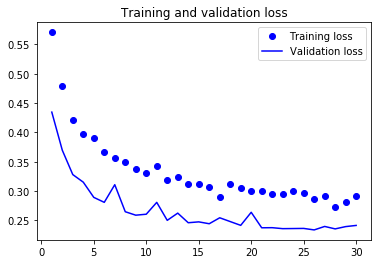

<Figure size 432x288 with 0 Axes>

In [116]:
# plot_loss(loss, val_loss, epochs)

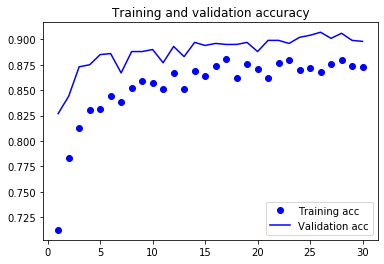

<Figure size 432x288 with 0 Axes>

In [117]:
# plot_accuracy(acc, val_acc, epochs)

Smoothing the curves

In [118]:
# def smooth_curve(points, factor=0.8):
#   smoothed_points = []
#   for point in points:
#     if smoothed_points:
#       previous = smoothed_points[-1]
#       smoothed_points.append(previous * factor + point * (1 - factor))
#     else:
#       smoothed_points.append(point)
#   return smoothed_points

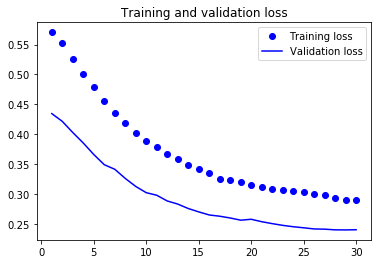

<Figure size 432x288 with 0 Axes>

In [119]:
# plot_loss(smooth_curve(loss), smooth_curve(val_loss), epochs)

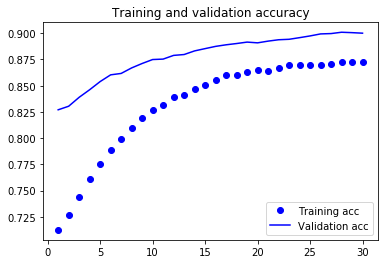

<Figure size 432x288 with 0 Axes>

In [120]:
# plot_accuracy(smooth_curve(acc), smooth_curve(val_acc), epochs)

Validation accuracy is 89.90%

#### Finally, evaluating model on test data

In [123]:
# test_generator = test_datagen.flow_from_directory(test_dir,
#                                                  target_size=(150,150),
#                                                  batch_size=20,
#                                                  class_mode='binary')

# test_loss, test_acc = model.evaluate(test_generator, steps=50)

Found 1000 images belonging to 2 classes.
50/50 [==============================] - 38s 770ms/step - loss: 0.2520 - acc: 0.8940


In [124]:
# print('test loss:', test_loss)
# print('test acc:', test_acc)

test loss: 0.2519580125808716
test acc: 0.8939999938011169


test accuracy 89.39%

### Visualizing intermediate activations

In [10]:
from tensorflow.keras.models import load_model

In [11]:
model = load_model('cats_and_dogs_small_2.h5')

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [26]:
img_path = '/Users/sidparmar/workspace-ml/deep-learning-with-python/cats_and_dogs/test/cats/1700.jpg'

from tensorflow.keras.preprocessing import image

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

img_tensor.shape

(1, 150, 150, 3)

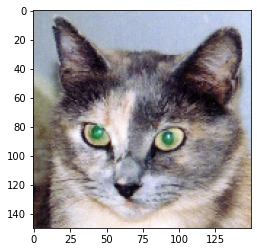

In [83]:
plt.imshow(img_tensor[0])

#### Instantiating a model from an input tensor and a list of output tensors

In [85]:
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

 Running the model in predict mode

In [86]:
activations = activation_model.predict(img_tensor)

In [88]:
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 148, 148, 32)

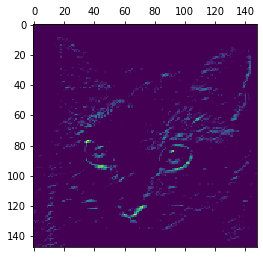

In [89]:
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

Let's try to see what 7th channel learned

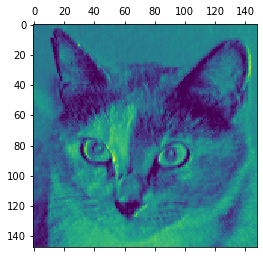

In [95]:
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

Visualizing every channel in every intermediate activation

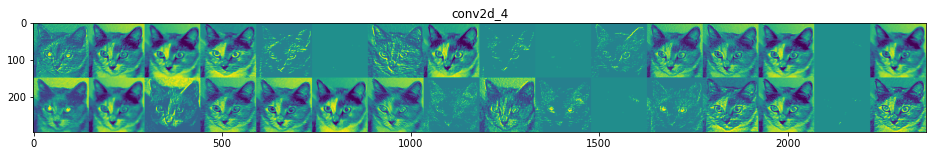

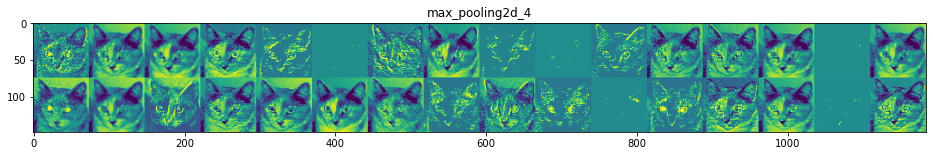

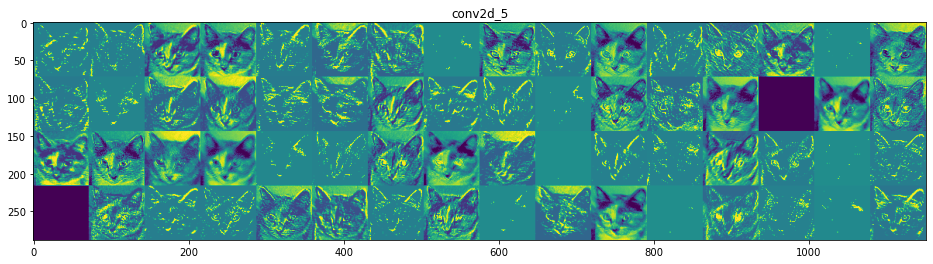

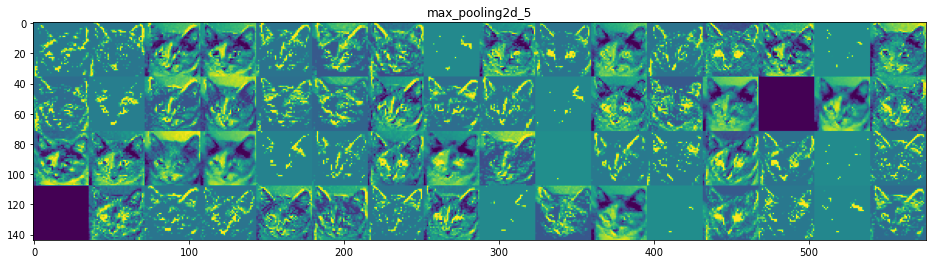

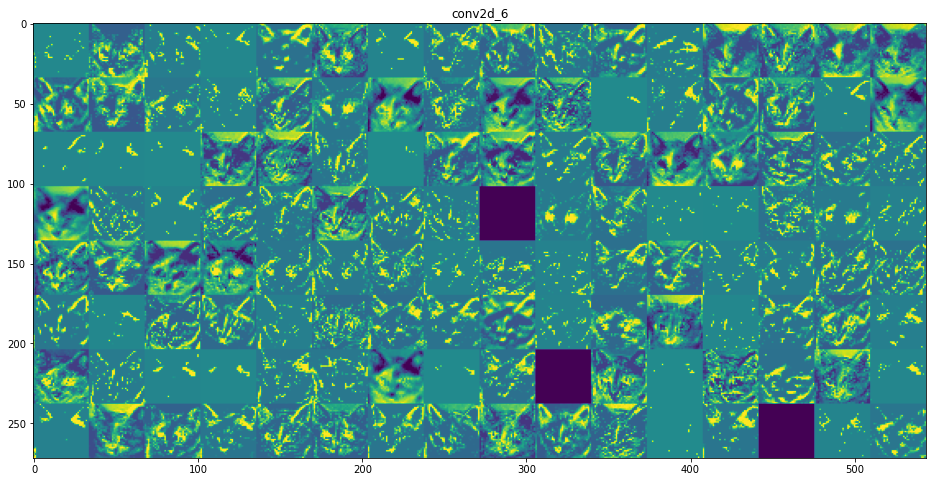

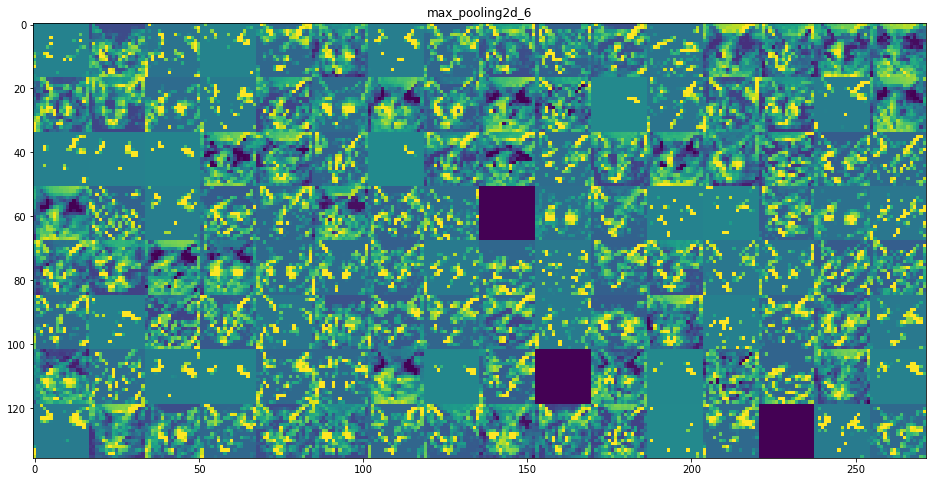

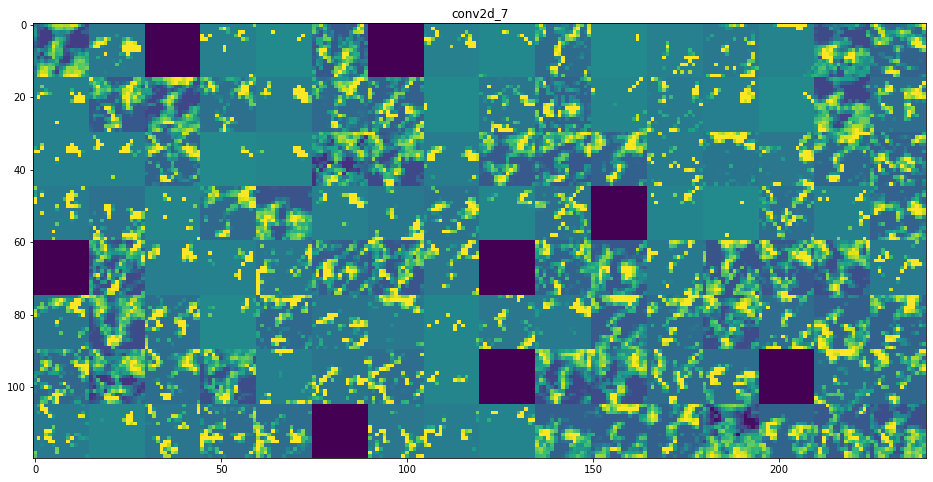

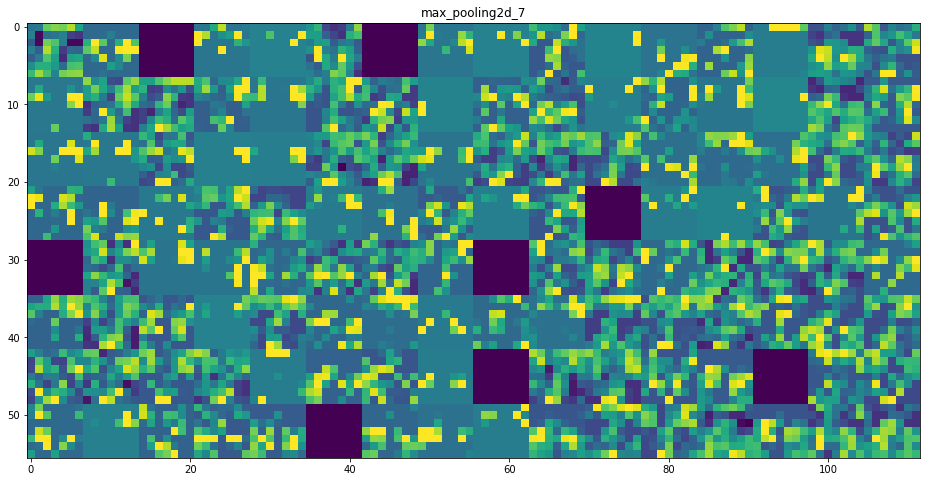

In [103]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]

    size = layer_activation.shape[1]

    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col * images_per_row + row]
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

### Visualizing convnet filters

Defining the loss tensor for filter visualization

In [12]:
from tensorflow.keras import backend as K

tf.compat.v1.disable_eager_execution()

In [13]:
model = VGG16(weights='imagenet',
             include_top= False)

In [14]:
layer_name = 'block2_conv1'
filter_index = 0

In [15]:
layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

In [16]:
grads = K.gradients(loss, model.input)[0]

In [17]:
grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

In [18]:
iterate = K.function([model.input], [loss, grads])

import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [19]:
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.

step = 1.
for i in range(40):
    loss_value, grads_value = iterate([input_img_data])

    input_img_data += grads_value * step

In [20]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    x += 0.5
    x = np.clip(x, 0, 1)

    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [21]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    grads = K.gradients(loss, model.input)[0]

    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

    iterate = K.function([model.input], [loss, grads])

    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.

    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step

    img = input_img_data[0]
    return deprocess_image(img)

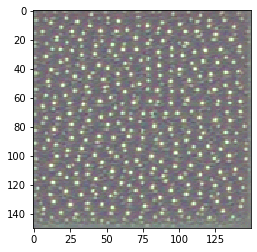

In [22]:
plt.imshow(generate_pattern('block3_conv1', 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


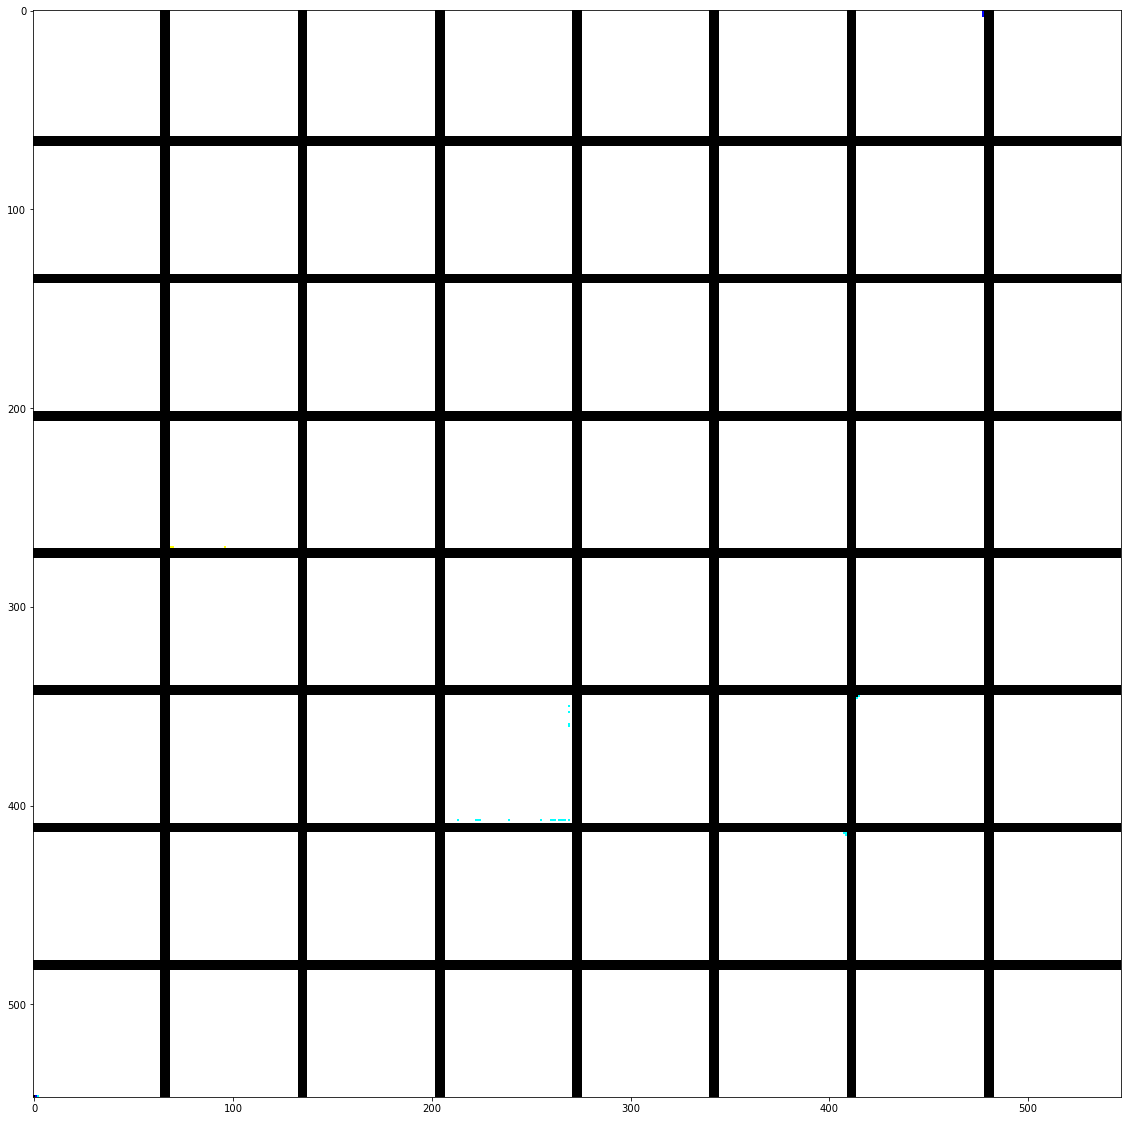

In [23]:
layer_name = 'block1_conv1'
size = 64
margin = 5

results = np.zeros((8 * size + 7 * margin, 8 * size + 7 * margin, 3))

for i in range(8):
    for j in range(8):
        filter_img = generate_pattern(layer_name, i + (j * 8), size=size)

        horizontal_start = i * size + i * margin
        horizontal_end = horizontal_start + size
        vertical_start = j * size + j * margin
        vertical_end = vertical_start + size
        results[horizontal_start: horizontal_end,
                vertical_start: vertical_end, :] = filter_img

plt.figure(figsize=(20, 20))
plt.imshow(results)

### Loading the VGG16 network with pretrained weights

In [31]:
model = VGG16(weights='imagenet')

In [32]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

img_path = '/Users/sidparmar/workspace-ml/deep-learning-with-python/african-elephants.jpeg'

img = image.load_img(img_path, target_size=(224, 224))

x = image.img_to_array(img)

x = np.expand_dims(x, axis=0)

x = preprocess_input(x)

In [33]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

/Users/sidparmar/opt/anaconda3/envs/ml/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Predicted: [('n02504458', 'African_elephant', 0.82256657), ('n01871265', 'tusker', 0.14780895), ('n02504013', 'Indian_elephant', 0.02962399)]


In [34]:
np.argmax(preds[0])

386

In [35]:
african_elephant_output = model.output[:, 386]

last_conv_layer = model.get_layer('block5_conv3')

grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]

pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input],
                     [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis=-1)

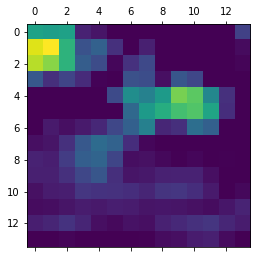

In [36]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [37]:
import cv2

img = cv2.imread(img_path)

heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))

heatmap = np.uint8(255 * heatmap)

heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

superimposed_img = heatmap * 0.4 + img

cv2.imwrite('/Users/sidparmar/workspace-ml/deep-learning-with-python/elephant_cam.jpg', superimposed_img)

True

In particular, it’s interesting to note that the ears of the elephant calf are strongly activated: this is probably how the network can tell the difference between African and Indian elephants.